# **Optical Conveyor Belt Transport Calculations for SrF molecules**

For Gen II SrF experiment, we will study cavity QED with molecules (e.g. cavity cooling and entanglement) in a science chamber that is separate from the MOT chamber.<br/>
**Optical transport of SrF molecules from MOT to science chamber using 2 static Gaussian beams offset in frequency using an AOM.**

**Here, only use scalar polarizability of SrF. Neglect the small contribution from vector and tensor Stark shift.**<br/>
In fact, absolute ground state N=0, J=1/2, F=0 has no vector or tensor Stark shift. But, **we will transport in N=1 rotational states.** 

**Lowest observed temperature for SrF molecules via $\Lambda$-cooling is $\sim 40\, \mu\text{K}$. Aim for minimum optical trap depth $\sim 400 \,\mu\text{K}$ during transport.**

We want to see if we can **use not-far-detuned trap light (e.g. $\lambda = 664-665\,\text{nm}$ or even closer)**. There is a trade-off between lower power requirement at low detuning, and higher scattering rate. **Let's see how close of detuning we can go before the trapping scheme breaks down.**


# Outline of this code:

1. Set the correct resonance wavelength for X-A transition.
2. Define scalar polarizability as function of detuning from resonance.
3. Use existing transport code to compute power needed to exceed threshold of $400 \,\mu\text{K}$ minimum trap depth throughout transport. Go in 0.1 nm increments from close-to-resonance out to roughly $\lambda = 665\,\text{nm}$ or unreasonable power requirement, whichever comes first. Assume no maglev.
4. Relegate maglev to end of code, if have time.

# Properties of SrF X-A Transition

Resonant frequency taken to be $\nu_0 = 451.95765\,\text{THz}$, equivalent to wavelength $\lambda_0 = 663.3198\,\text{nm}$.<br/>
Scalar polarizability in N=0 and N=1 states of $X^2\Sigma$ at $\lambda = 1064\,\text{nm}$ is 240 a.u. (atomic units). <br/>
Vector contribution is 1-3 a.u. for non-F=0 states and tensor contribution is 10-20 a.u. for non-F=0 states in N=1.

So in general, we can ignore the vector and tensor contributions of polarizability to the AC Stark shift here, to simplify our calculation.

# Summary of Main Results

Optical transport of SrF molecules from MOT chamber to science chamber using 2 static Gaussian beams offset in frequency using an AOM is possible.<br/>
**Calculations are performed using scalar polarizability of SrF, assuming small to negligible contribution from vector and tensor Stark shift.**<br/>
In fact, for **absolute ground state N=0, J=1/2, F=0, there is no vector or tensor Stark shift.** (although we will probably transport in N=1 states). <br/>

**Scalar polarizability of SrF in N=0 and N=1 states of $X^2\Sigma$ ($\lambda_0 = 663$ nm) at $\lambda = 1064$ nm is 240 a.u. (atomic units).** Vector contribution is $\sim$ 1-3 a.u. for non-F=0 states, and tensor contribution is $\sim$ 10-20 a.u. for non-F=0 states in N=1.

**The lowest temperature we can reach for SrF molecules via $\Lambda$-cooling is $\sim$ 40 $\mu$ K. Assuming we want trap depth to be $\sim$ 10x higher for efficient trapping, then we aim for optical trap depths $\sim$ 400 $\mu$ K during transport.** 

We want to see if we can get away with using not-far-detuned trap light (i.e. $\lambda = 664-665$ nm or even closer). There is a trade-off between less power at low detuning, and higher scattering rate. Let's see how close of detuning can we go before it doesn't work anymore.

Take the resonant wavelength of X-A transition to be $\lambda_0 = 663.320328 \,\text{nm}$.

**At trap wavelength $\lambda = 664$ nm (451.8 THz), we need $P \sim 1.2$ mW** to replicate performance of transport scheme.

Preliminary estimates indicate that **even for close-detuned trap light, scattering rate does not exceed $\sim 1 \,\text{ms}^{-1}$**, which is an acceptable loss rate during transport.

# More Detailed Results

For trap wavelength **$\lambda = 664$ nm (451.8 THz), $P \sim 300$ mW** gives optimal results when **$w_0 = 147.2\,\mu$ m, $x_0 = 5.83$ cm (no maglev)** and **$w_0 = 170.4\,\mu$ m, $x_0 = 6.13$ cm (maglev)**.<br/>
The corresponding best minimum trap depth is: **88 $\mu$ K (no maglev)** and **99 $\mu$ K (maglev)**. **Axial acceleration** from best transport profiles (assuming maglev) reduces axial depth to **96 $\mu$ K for $v_\text{avg}$ up to 15 m/s**, and **86 $\mu$ K for $v_\text{avg}$ up to 25 m/s**.

Higher wavelength trap light leads to reduced Rayleigh range, rendering maglev more effective for longer wavelength trap light. The same thing applies for axial trap tilt due to transport profile.

Any discrepancies in numerically computed optima are due to the resolution used in the heat maps. Higher resolution heat maps should converge to the correct optima, although it's likely that the optima are degenerate in the space $(w_0, x_0)$. For completeness, I list the marginal discrepancies below:

For 50x50 grid points and no maglev, the computed optima $(w_0, x_0)$ were: (147 $\mu$ m, 5.86 cm) @ 664 nm.

For 200x200 grid points and no maglev, the computed optima $(w_0, x_0)$ were: (147.2 $\mu$ m, 5.83 cm) @ 664 nm.

For 50x50 grid points and maglev, the computed optima $(w_0, x_0)$ were: (171 $\mu$ m, 6.12 cm) @ 664 nm.

For 200x200 grid points and maglev, the computed optima $(w_0, x_0)$ were: (170.4 $\mu$ m, 6.13 cm) @ 664 nm.

# Import Relevant Packages and Constants

In [25]:
#import relevant Python packages, special functions, and constants
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, mu_0, c, k, g, hbar, physical_constants
from scipy.special import ellipk, ellipe
from scipy.optimize import curve_fit

# Define polarizability as a function of detuning from resonance

Compute $\alpha_s, \alpha_v, \alpha_t$ as function of detuning from resonance. <br/>
We find that $\alpha_s$ is the dominant contribution, with $\sim 10\%$ correction from $\alpha_t$ and $\sim 1\%$ correction from $\alpha_v$. For rest of calculation, just use $\alpha_s$ for simplicity.

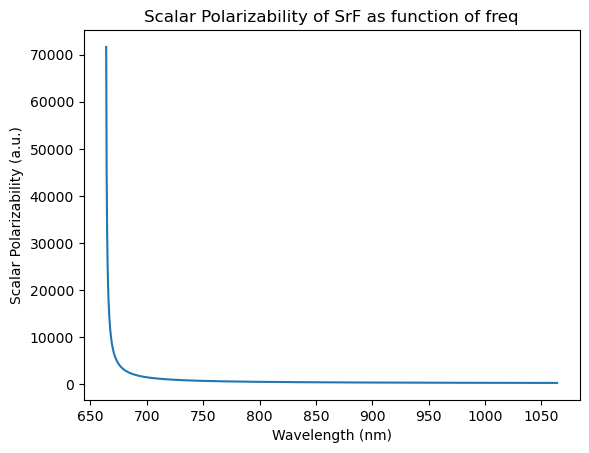

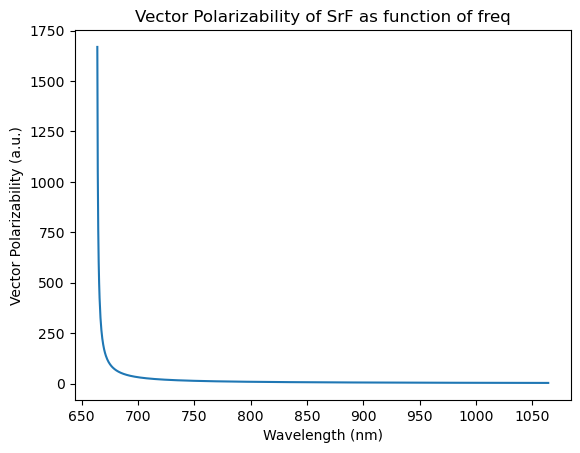

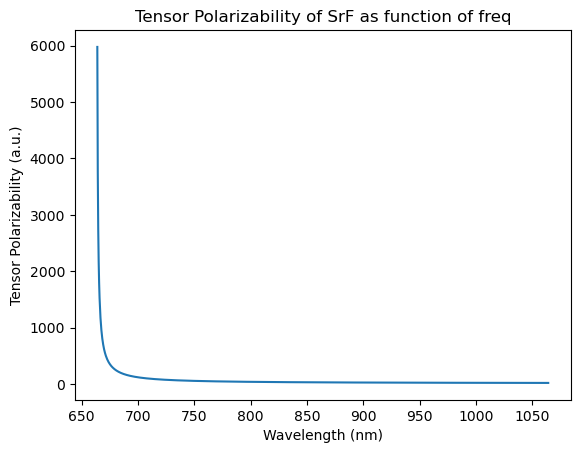

In [26]:
#our reference is the polarizability at 1064 nm calculated by Qian (see eq. 10 and Table 10 in "AC_Stark_Shift" writeup).
alpha_s_0 = 240.08 # in a.u.
alpha_v_0 = 3.49 #in a.u.
alpha_t_0 = 20.02 #in a.u.
resonance_freq = 451.95765e12 #in Hz
ODT_freq = 281.8e12 #in Hz

#here, freq is in units of THz
def alpha_s(lam):
    freq = c/lam
    return alpha_s_0*(1/(resonance_freq - freq) + 1/(resonance_freq + freq))/(1/(resonance_freq - ODT_freq) + 1/(resonance_freq + ODT_freq))

def alpha_v(lam):
    freq = c/lam
    return alpha_v_0*(1/(resonance_freq - freq) - 1/(resonance_freq + freq))/(1/(resonance_freq - ODT_freq) - 1/(resonance_freq + ODT_freq))

def alpha_t(lam):
    freq = c/lam
    return alpha_t_0*(1/(resonance_freq - freq) + 1/(resonance_freq + freq))/(1/(resonance_freq - ODT_freq) + 1/(resonance_freq + ODT_freq))

#plot how alpha_s scales for wavelength from 1064 nm to 664 nm
lam = np.linspace(664e-9, 1064e-9, 1000)
plt.plot(lam*1e9, alpha_s(lam))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Scalar Polarizability (a.u.)')
plt.title('Scalar Polarizability of SrF as function of freq')
plt.show()

#plot how alpha_v scales for freq from 451.5 THz to 240 THz
plt.plot(lam*1e9, alpha_v(lam))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Vector Polarizability (a.u.)')
plt.title('Vector Polarizability of SrF as function of freq')
plt.show()

#plot how alpha_t scales for freq from 451.5 THz to 240 THz
plt.plot(lam*1e9, alpha_t(lam))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Tensor Polarizability (a.u.)')
plt.title('Tensor Polarizability of SrF as function of freq')
plt.show()

# Define Relevant Parameters for SrF Experiment.

Some quick back-of-envelope calculation. Scalar polarizability of SrF at 1064 nm is ~5 times worse than Cs (240 a.u vs 1162 a.u). So we need ~100 W of power at 1064 nm to achieve similar performance, e.g. minimum trap depths of 70 $\mu$ K along radial gravitational axis, 90 $\mu$ K along axial axis, and 125 $\mu$ K along radial non-gravitational axis.

SrF lowest temperature with $\Lambda$-cooling is roughly 10 $\mu$ K so we almost certainly need trap depths of 50-100 $\mu$ K for this to be viable.

1064 nm is 282 THz, 664 nm is 451.8 THz, and 663 nm is 452.5 THz. Polarizability scales roughly as 1/$\Delta$ (from 2nd order perturbation theory, it's actually 1/($\omega - \omega_0$) + 1/($\omega$ + $\omega_0$)), and so trap depth scales as $\sim P/\Delta$. So if we do 664 nm trap light, then the scalar polarizability increases by 203.24x and so power decreases by that amount to maintain similar peformance. This corresponds to roughly 500 mW required. 

If we go to 670 nm (447.8 THz) so that a dichroic could (maybe) be doable, then scalar polarizability increases by 29.43x, and so we need ~3 W. <br/>
Likewise, go to 685 nm (438 THz) which is our v=1 repumper wavelength, then scalar polarizability increases by 9.68x, and so we need ~10 W.

However, we should point out that the minimum trap depth in this scheme is also dictated by the Rayleigh range $z_R$ of the trap light, which roughly gives a sense of the "spatial extent" of the highly intense light in the axial direction. $z_R$ is inversely proportional to wavelength $\lambda$, so we do get longer Rayleigh range at shorter wavelength which can help offset the (still) high power requirement at not-far-detuning trap wavelength. For same $w_0$, $z_R$ at 664 nm is 1.6x more than at 1064 nm, so power requirement is roughly 60% of before. Crudely, we estimate needing 300 mW of trap light power for this scheme.

Finally, even though scattering rate roughly scales like $\sim P/\Delta^2$, we did preliminary calculations to estimate that not-far-detuning will not be a huge concern for us, since it's on the order of 1 $\text{ms}^{-1}$.

# Define parameters for transport geometry

In [27]:
#physical constants
bohr_rad = physical_constants['Bohr radius'][0] #Bohr radius in m
amu = physical_constants['atomic mass constant'][0] #atomic mass unit in kg

#transport geometry and parameters
L = 40e-2 #length of conveyor belt in m. Assume for our chamber the transport distance is roughly 40 cm.
detuning = 0.19e12 #detuning of trap light in Hz (assume positive for red detuning)
resonance_freq = 451.95765e12 #in Hz
traplight_freq = resonance_freq - detuning #frequency of trap light in Hz
lam = c/traplight_freq #wavelength of trap light in m
P = 0.2 #trap light power in W

#SrF molecule parameters
m_SrF = 107 * amu #mass of SrF in kg. Sr-88 and F-19 isotopes.
gamma_SrF = 2*np.pi*6.6e6 #decay rate of SrF in Hz

#polarizability (only scalar) in real units
def alpha_SrF(lam):
    return alpha_s(lam) * 4*np.pi*epsilon_0 * bohr_rad**3

#waist size and focus position optimization parameters
w0min = 100e-6 #minimum waist to explore in parameter search
w0max = 250e-6#maximum waist to explore in parameter search
x0min = 0 #minimum focus position to explore in parameter search
x0max = L/2 #maximum focus position to explore in parameter, because the geometry is symmetric

#sample trap waist size and position
w0 = 180e-6 #optimum waist of light in m (no maglev)
x0 = 6.14e-2 #optimum focus position in m (no maglev)

#optimal parameter search params
num_grid_pts = 20 #number of grid points in heat map for calculating overall depth

# Define Functions for Gaussian Laser Beam

In [28]:
#define relevant functions for a Gaussian laser beam
#x is position along beam axis. w0 is beam waist. 
#x0 is focal point. lam is wavelength. P is power. 
#y and z are transverse coordinates.

def w(x,w0,x0,lam):
    xR = np.pi * w0**2 / lam
    return w0 * np.sqrt(1 + ((x-x0) / xR)**2)

def I0(P,x,w0,x0,lam):
    return 2 * P / (np.pi * w(x,w0,x0,lam)**2)

def gaussian_beam_intensity(x,x0,y,z,w0,lam,P):
    intensity = I0(P,x,w0,x0,lam) * np.exp(-2 * (y**2 + z**2) / w(x,w0,x0,lam)**2)
    return intensity

# Define Functions for Optical Conveyor Belt

Optical conveyor belt is formed by interfering counter-propagating Gaussian laser beams.<br/>
"No cosine" term is used when computing trap depth because by definition, trap depth is the "height" of the antinodes of the standing wave.

In [29]:
#define relevant functions for optical conveyor belt using interfering counter-propagating Gaussian beams
def conveyor_intensity(x,x0,y,z,w0,lam,P):
    k = 2 * np.pi / lam
    I1 = gaussian_beam_intensity(x,x0,y,z,w0,lam,P)
    I2 = gaussian_beam_intensity(x,L-x0,y,z,w0,lam,P)
    total = I1 + I2 + 2 * np.sqrt(I1 * I2) * np.cos(2*k*x)
    return total

#no cos is used for calculating trap depth which occurs at max intensity (antinodes)
def conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P):
    I1 = gaussian_beam_intensity(x,x0,y,z,w0,lam,P)
    I2 = gaussian_beam_intensity(x,L-x0,y,z,w0,lam,P)
    total = I1 + I2 + 2 * np.sqrt(I1 * I2)
    return total

# Example of Optical Conveyor Belt Radial Intensity Profile Including Gravity

Gravity tilts the trapping potential because it's a linear mgz term.

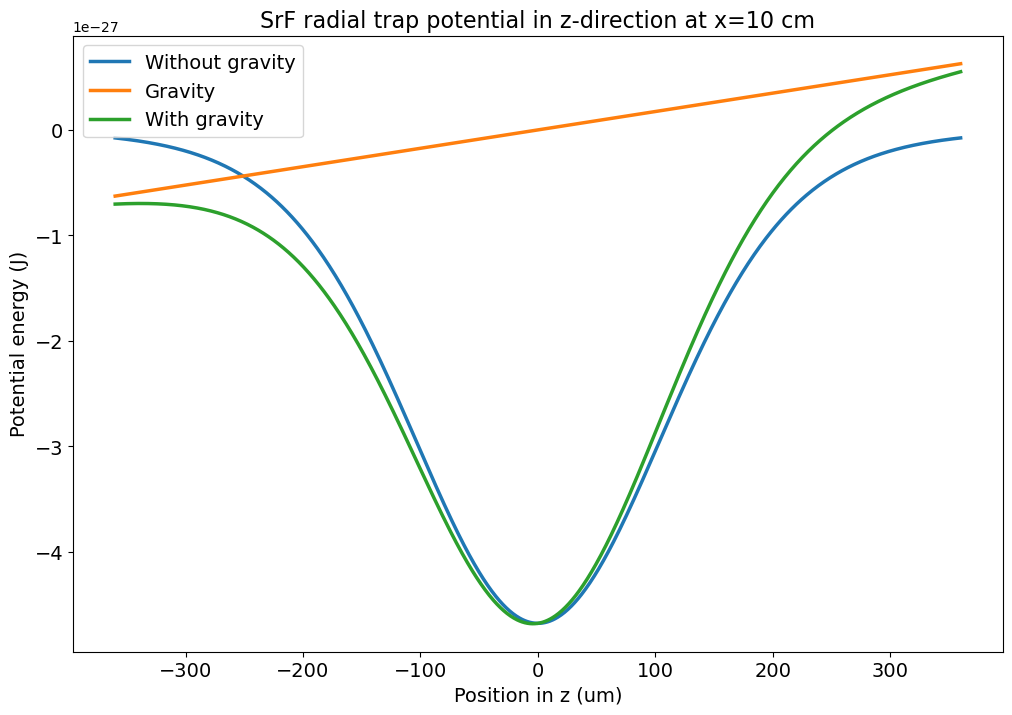

In [30]:
#plot radial depth including gravity (z-direction)

#first, let's plot an example of what the trapping potential looks like as a function of z, for some fixed axial position x along the belt
x = 10e-2 #10 cm along the belt
y = 0 

#potential well for SrF in the z-direction without gravity
def U_radial_SrF_without_grav(z,x,x0,w0,lam,P):
    return -alpha_SrF(lam)/(2*epsilon_0*c) * conveyor_intensity(x,x0,y,z,w0,lam,P)

#ignore cosine interference term
def U_radial_SrF_without_grav_no_cos(z,x,x0,w0,lam,P):
    return -alpha_SrF(lam)/(2*epsilon_0*c) * conveyor_intensity_no_cos(x,x0,y,z,w0,lam,P)

#potential well for SrF in z-direction including gravity
def U_radial_SrF_with_grav(z,x,x0,w0,lam,P):
    return U_radial_SrF_without_grav(z,x,x0,w0,lam,P) + m_SrF * g * z

def U_radial_SrF_with_grav_no_cos(z,x,x0,w0,lam,P):
    return U_radial_SrF_without_grav_no_cos(z,x,x0,w0,lam,P) + m_SrF * g * z

z = np.linspace(-2*w0,2*w0,1000)
plt.figure(figsize=(12, 8))
plt.plot(z*1e6,U_radial_SrF_without_grav(z,x,x0,w0,lam,P), label='Without gravity', linewidth=2.5)
plt.plot(z*1e6, m_SrF * g * z, label='Gravity', linewidth=2.5)
plt.plot(z*1e6,U_radial_SrF_with_grav(z,x,x0,w0,lam,P), label='With gravity', linewidth=2.5)
plt.xlabel('Position in z (um)', fontsize=14)
plt.ylabel('Potential energy (J)', fontsize=14)
plt.title(f'SrF radial trap potential in z-direction at x={100*x:.0f} cm', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#extract difference between local max for z > 0 and local min
depth = (np.max(U_radial_SrF_with_grav(z,x,x0,w0,lam,P)[z<0]) - np.min(U_radial_SrF_with_grav(z,x,x0,w0,lam,P)))/k*1e6

# SrF Optical Transport Calculations

## Axial (x), Non-Gravity Radial (y), and Gravity Radial (z) Trap Depths along Transport Axis (x)

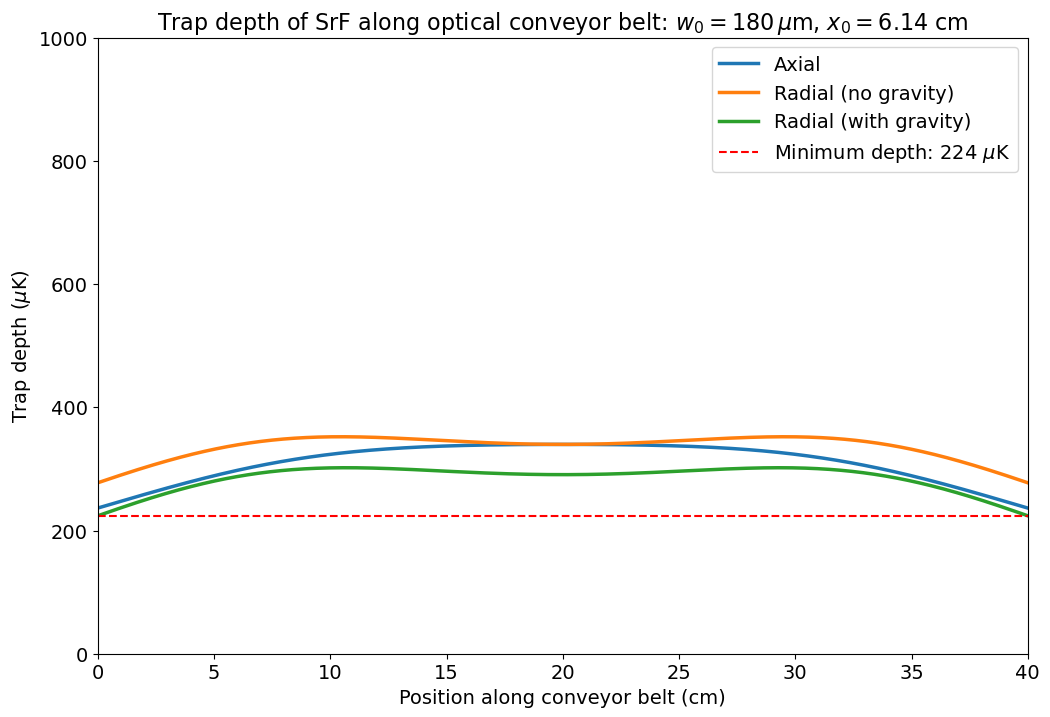

In [31]:
#now calculate the radial trap depth including gravity along the optical conveyor belt axis

x = np.linspace(0,L,1000)
y = 0
z = np.linspace(-2*w0,2*w0,1000)
depths = np.empty(len(x))

#no cos because we only consider trapping at the antinodes of the standing wave
for i in range(len(x)):
    depths[i] = (np.max(U_radial_SrF_with_grav_no_cos(z,x[i],x0,w0,lam,P)[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z,x[i],x0,w0,lam,P)))/k*1e6

#plot radial and axial trap depths

#in hindsight I could probably also do this with no cos since we only care about the antinodes?
def U_axial_potential_SrF(x,x0,y,z,w0,lam,P):
    return -(alpha_SrF(lam)/(2*epsilon_0*c))*conveyor_intensity(x,x0,y,z,w0,lam,P)

#axial trap depth of SrF in uK (x-direction)
def U_axial_SrF(x,x0,w0,lam,P):
    peak_intensity1 = I0(P,x,w0,x0,lam)
    peak_intensity2 = I0(P,x,w0,L-x0,lam)
    return (2*alpha_SrF(lam)*np.sqrt(peak_intensity1*peak_intensity2)/(epsilon_0*c)/k)*1e6

#radial trap depth of SrF in uK without gravity (y-direction)
def U_radial_SrF(x,x0,w0,lam,P):
    peak_intensity1 = I0(P,x,w0,x0,lam)
    peak_intensity2 = I0(P,x,w0,L-x0,lam)
    return (alpha_SrF(lam)/(2*epsilon_0*c)) * (peak_intensity1 + peak_intensity2 + 2*np.sqrt(peak_intensity1*peak_intensity2))/k*1e6

min_axial = np.min(U_axial_SrF(x,x0,w0,lam,P))
min_radial = np.min(U_radial_SrF(x,x0,w0,lam,P))
min_radial_grav = np.min(depths)
overall_min = min(min_axial, min_radial, min_radial_grav)

plt.figure(figsize=(12, 8))
plt.plot(x*1e2,U_axial_SrF(x,x0,w0,lam,P), label='Axial', linewidth=2.5)
plt.plot(x*1e2,U_radial_SrF(x,x0,w0,lam,P), label='Radial (no gravity)', linewidth=2.5)
plt.plot(x*1e2,depths, label='Radial (with gravity)', linewidth=2.5)
plt.axhline(y=overall_min, color='red', linestyle='--', label=f'Minimum depth: {round(overall_min)} $\mu$K')
plt.xlabel('Position along conveyor belt (cm)', fontsize=14)
plt.ylabel('Trap depth ($\mu$K)', fontsize=14)
plt.title(f'Trap depth of SrF along optical conveyor belt: $w_0 = {w0*1e6:.0f}\, \mu$m, $x_0 = {x0*1e2:.2f}$ cm', fontsize=16)
plt.ylim(0, 1000)
plt.xlim(0, L*1e2)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.show()

# Optimize for beam waist ($w_0$) and focus ($x_0$) positions for no magnetic levitation
## Compute minimum SrF trap depth (among axial and radial) along transport path.

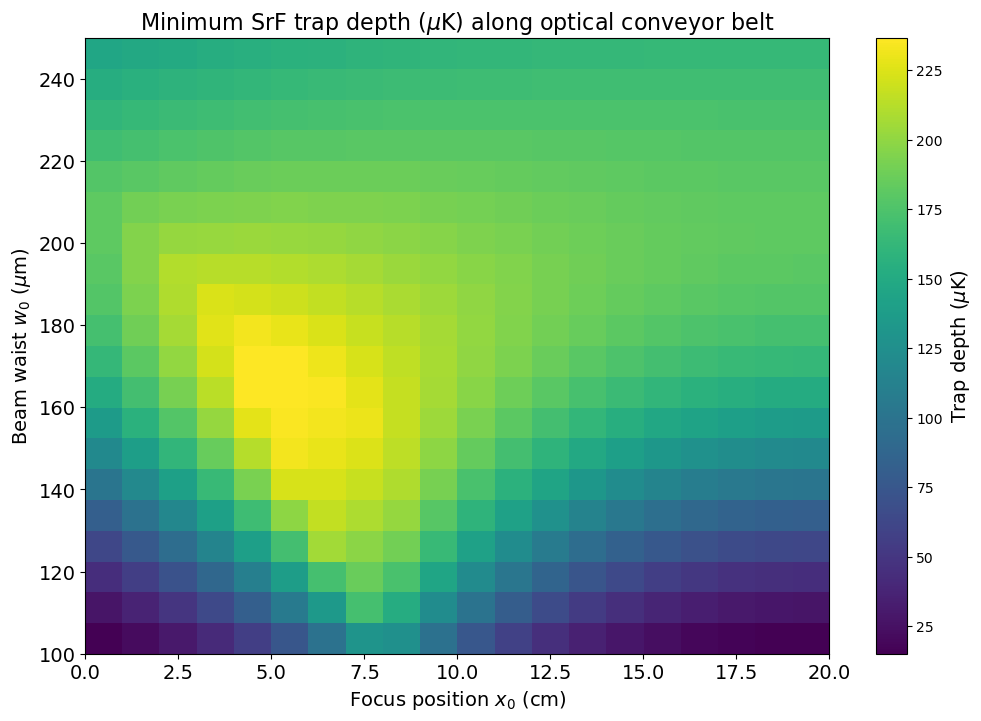

Optimum temperature: 237 µK
Optima coordinates: (w₀ = 163.2 µm, x₀ = 4.21 cm)


In [32]:
#for a range of beam waists and focus positions, compute the minimum trap depth (among radial and axial)
#along the optical conveyor belt path

x0s = np.linspace(x0min, x0max, num_grid_pts) #in m
w0s = np.linspace(w0min, w0max, num_grid_pts) #in m
overall_mins = np.empty((len(x0s), len(w0s)))

for i in range(len(x0s)):
    for j in range(len(w0s)):
        x = np.linspace(0,L,1000)
        y = 0
        z = np.linspace(-2*w0s[j],2*w0s[j],1000)
        depths = np.empty(len(x))

        #no cos because we only consider trapping at the antinodes of the standing wave
        for index in range(len(x)):
            depths[index] = (np.max(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lam,P)[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lam,P)))/k*1e6

        min_axial = np.min(U_axial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial = np.min(U_radial_SrF(x,x0s[i],w0s[j],lam,P))
        min_radial_grav = np.min(depths)
        overall_min = min(min_axial, min_radial, min_radial_grav)
        overall_mins[i][j] = overall_min
        #print(overall_mins[i][j], i, j, x0s[i], w0s[j])

overall_mins_final = np.transpose(overall_mins) #rows and cols in 2d matrix plot are flipped
plt.figure(figsize=(12, 8))
plt.imshow(overall_mins_final, extent=[x0min*1e2, x0max*1e2, w0min*1e6, w0max*1e6], origin='lower', aspect='auto')
plt.colorbar().set_label('Trap depth ($\mu$K)', fontsize=14)
plt.xlabel('Focus position $x_0$ (cm)', fontsize=14)
plt.ylabel('Beam waist $w_0$ ($\mu$m)', fontsize=14)
plt.title('Minimum SrF trap depth ($\mu$K) along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

max_value = np.max(overall_mins_final)
max_coords = np.unravel_index(np.argmax(overall_mins_final), overall_mins_final.shape)
optimal_x0 = x0s[max_coords[1]] * 1e2  # Convert to cm
optimal_w0 = w0s[max_coords[0]] * 1e6  # Convert to µm
print(f'Optimum temperature: {max_value:.0f} µK')
print(f'Optima coordinates: (w\u2080 = {optimal_w0:.1f} µm, x\u2080 = {optimal_x0:.2f} cm)')

# Now do parameter search for best combination of power and detuning.

Note the power is in a single pass.

In [33]:
start_wavelen_scan = 663.6e-9 # 190 GHz detuning
end_wavelen_scan = 665.1e-9 # 1.14 THz detuning
wavelen_scan_increment = 0.1e-9# go in 0.1 nm increments
lams = np.arange(start_wavelen_scan, end_wavelen_scan, wavelen_scan_increment)
detunings = resonance_freq - c/lams # in Hz
Ps = np.arange(0.1, 1.05, 0.05) # trap light power in W

num_grid_pts = 10 # this seems good enough resolution for heat map of (xs, ws) to get reasonable estimate of optimal trap depth
best_trap_depths = np.empty((len(detunings), len(Ps)))
best_w0s = np.empty((len(detunings), len(Ps)))
best_x0s = np.empty((len(detunings), len(Ps)))

scattering_rates = np.empty((len(detunings), len(Ps)))

In [34]:
#for a range of beam waists and focus positions, compute the minimum trap depth (among radial and axial)
#along the optical conveyor belt path

for a in range(len(lams)):
    for b in range(len(Ps)):
        x0s = np.linspace(x0min, x0max, num_grid_pts) #in m
        w0s = np.linspace(w0min, w0max, num_grid_pts) #in m
        overall_mins = np.empty((len(x0s), len(w0s)))

        for i in range(len(x0s)):
            for j in range(len(w0s)):
                x = np.linspace(0,L,1000)
                y = 0
                z = np.linspace(-2*w0s[j],2*w0s[j],1000)
                depths = np.empty(len(x))

                #no cos because we only consider trapping at the antinodes of the standing wave
                for index in range(len(x)):
                    depths[index] = (np.max(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lams[a],Ps[b])[z<0]) - np.min(U_radial_SrF_with_grav_no_cos(z,x[index],x0s[i],w0s[j],lams[a],Ps[b])))/k*1e6

                min_axial = np.min(U_axial_SrF(x,x0s[i],w0s[j],lams[a],Ps[b]))
                min_radial = np.min(U_radial_SrF(x,x0s[i],w0s[j],lams[a],Ps[b]))
                min_radial_grav = np.min(depths)
                overall_min = min(min_axial, min_radial, min_radial_grav)
                overall_mins[i][j] = overall_min

        overall_mins_final = np.transpose(overall_mins) #rows and cols in 2d matrix plot are flipped
        max_value = np.max(overall_mins_final)
        max_coords = np.unravel_index(np.argmax(overall_mins_final), overall_mins_final.shape)
        optimal_x0 = x0s[max_coords[1]] * 1e2  # Convert to cm
        optimal_w0 = w0s[max_coords[0]] * 1e6  # Convert to µm
        best_trap_depths[a][b] = max_value
        scattering_rates[a][b] = gamma_SrF * (max_value * k * 1e-6) / (hbar*2*np.pi*detunings[a])*(c/lams[a]/resonance_freq)**3
        best_w0s[a][b] = optimal_w0
        best_x0s[a][b] = optimal_x0
        print(f'Optimum temperature: {max_value:.0f} µK')
        print(f'Scattering rate: {scattering_rates[a][b]:.2f} s$^-1$')
        #print(f'Optima coordinates: (w\u2080 = {optimal_w0:.1f} µm, x\u2080 = {optimal_x0:.2f} cm)')

Optimum temperature: 106 µK
Scattering rate: 749.96 s$^-1$
Optimum temperature: 175 µK
Scattering rate: 1240.39 s$^-1$
Optimum temperature: 236 µK
Scattering rate: 1673.34 s$^-1$
Optimum temperature: 294 µK
Scattering rate: 2091.68 s$^-1$
Optimum temperature: 353 µK
Scattering rate: 2510.01 s$^-1$
Optimum temperature: 412 µK
Scattering rate: 2928.35 s$^-1$
Optimum temperature: 471 µK
Scattering rate: 3346.68 s$^-1$
Optimum temperature: 530 µK
Scattering rate: 3765.02 s$^-1$
Optimum temperature: 589 µK
Scattering rate: 4183.35 s$^-1$
Optimum temperature: 648 µK
Scattering rate: 4601.69 s$^-1$
Optimum temperature: 707 µK
Scattering rate: 5020.02 s$^-1$
Optimum temperature: 766 µK
Scattering rate: 5438.36 s$^-1$
Optimum temperature: 825 µK
Scattering rate: 5856.69 s$^-1$
Optimum temperature: 883 µK
Scattering rate: 6275.03 s$^-1$
Optimum temperature: 942 µK
Scattering rate: 6693.36 s$^-1$
Optimum temperature: 1001 µK
Scattering rate: 7111.70 s$^-1$
Optimum temperature: 1060 µK
Scattering 

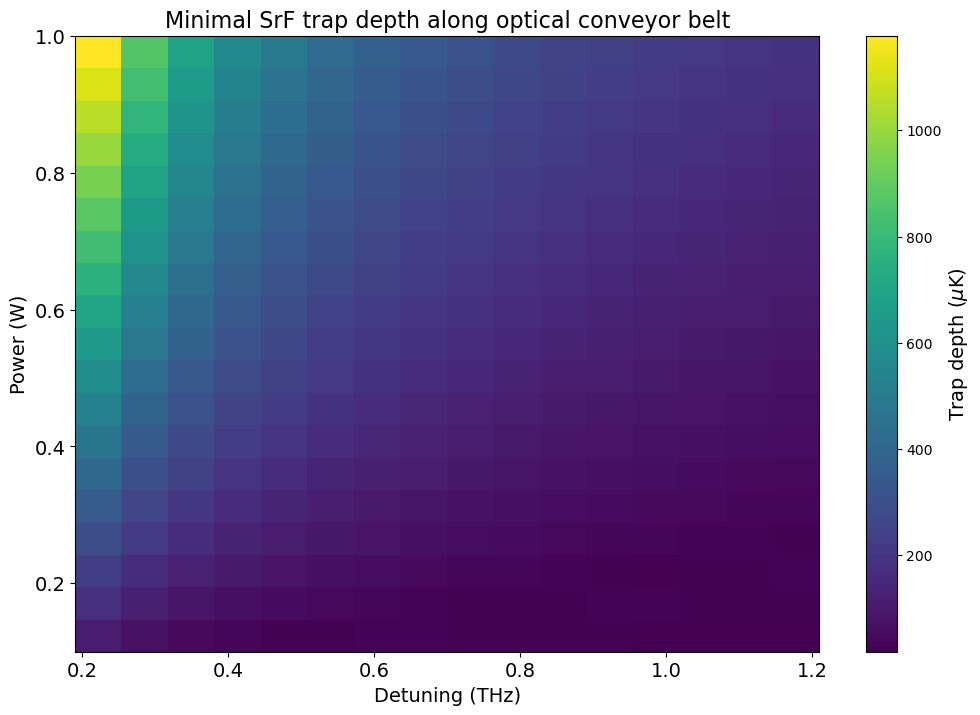

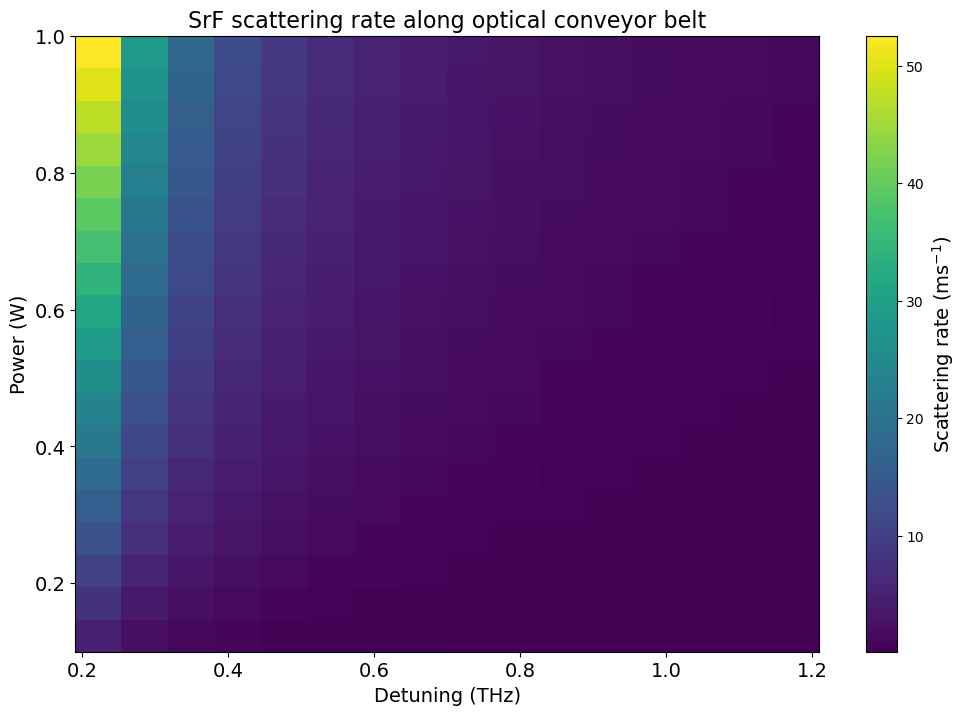

In [43]:
#plot result from above

plt.figure(figsize=(12, 8))
plt.imshow(np.transpose(best_trap_depths), extent=[detunings[0]/1e12, detunings[-1]/1e12, Ps[0], Ps[-1]], origin='lower', aspect='auto')
plt.colorbar().set_label('Trap depth ($\mu$K)', fontsize=14)
plt.xlabel('Detuning (THz)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)
plt.title('Minimal SrF trap depth along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.transpose(scattering_rates/1e3), extent=[detunings[0]/1e12, detunings[-1]/1e12, Ps[0], Ps[-1]], origin='lower', aspect='auto')
plt.colorbar().set_label('Scattering rate (ms$^{-1}$)', fontsize=14)
plt.xlabel('Detuning (THz)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)
plt.title('SrF scattering rate along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

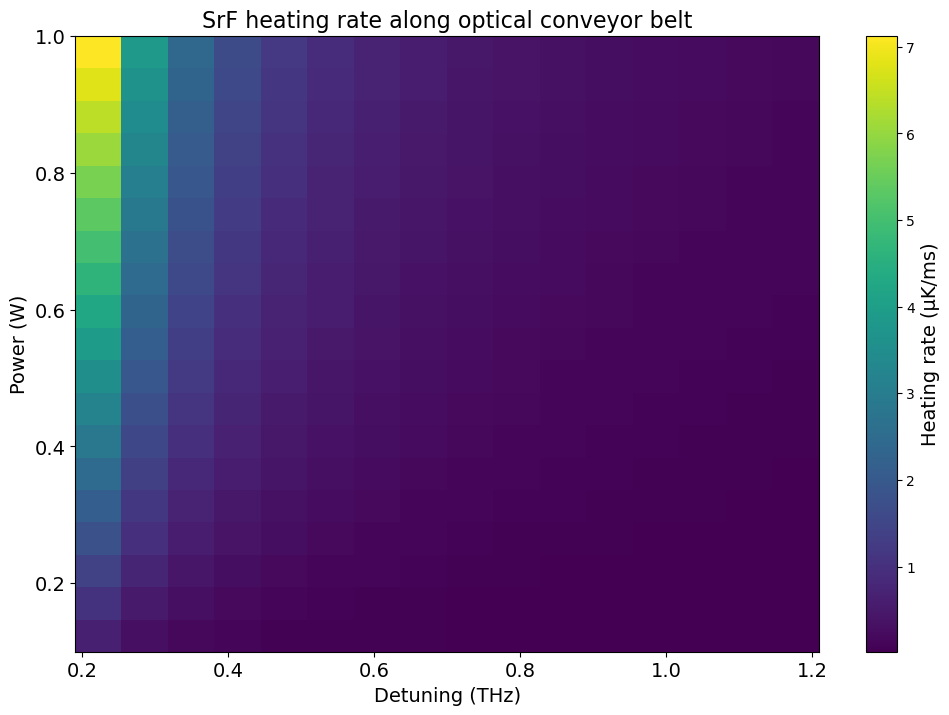

In [ ]:
#also add in the heating rate
resonance_wavelen = c / resonance_freq
recoil_temp = hbar**2 * (2*np.pi/resonance_wavelen)**2 / (m_SrF * k)

heating_rates = scattering_rates * recoil_temp/3

plt.figure(figsize=(12, 8))
plt.imshow(np.transpose(heating_rates*1e3), extent=[detunings[0]/1e12, detunings[-1]/1e12, Ps[0], Ps[-1]], origin='lower', aspect='auto')
plt.colorbar().set_label('Heating rate (µK/ms)', fontsize=14)
plt.xlabel('Detuning (THz)', fontsize=14)
plt.ylabel('Power (W)', fontsize=14)
plt.title('SrF heating rate along optical conveyor belt', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()